목차

I. 프로젝트 준비단계

II. 프로젝트 : 다양한 OCR모델 비교하기

루브릭 평가 기준

1. OCR을 활용하여 구현하려는 서비스의 기획이 타당한가?

목표로 하는 서비스가 OCR를 적용 가능하며, OCR을 활용했을 때 더욱 유용해진다.

2. 모델 평가기준이 명확하고 체계적으로 세워졌는가?

평가 기준에 부합하는 테스트 데이터의 특징이 무엇인지 명확하게 제시되었다.

3. 평가기준에 따라 충분한 분량의 테스트가 진행되고 그 결과가 잘 정리되었는가?

최대 20장까지의 테스트 이미지를 사용해 제시된 평가 기준에 따른 테스트 결과가 잘 정리되어 결론이 도출되었다.



소감

Tesseract ocr은 제대로 글자를 읽는지 의문이 든다.  간단한 영어 단어카드도 제대로 읽지를 못하고 있다. 
NLP에 이어 CV에 있는 글자를 읽어내는것이 힘들다니. 난 어디로 가야하나......

# I. 프로젝트 준비단계

## 1. 기계는 어떤 과정으로 읽을까?

구글 API에서는 문자의 영역을 사각형으로 표현하고 우측에 Block과 Paragraph로 구분해서 인식 결과를 나타내고 있었습니다. 

구글 API가 이미지에 박스를 친 다음 박스별 텍스트의 내용을 알려준 것처럼, 문자 모델은 보통 두 단계로 이뤄집니다.

먼저 입력받은 사진 속에서 문자의 위치를 찾아냅니다. 이 과정을 Text Detection(문자검출) 이라고 합니다. 

찾은 문자 영역으로부터 문자를 읽어내는 것은 Text Recognition(문자인식) 입니다. 

예를 들어 아래 카카오의 OCR 모델은 먼저 문자가 있는 영역의 정보 (coord, Text Recognition)를 찾아내고, 각 영역에서 문자를 인식하고 있습니다. 

이렇게 문자 인식 모델은 Text Detection과 Recognition 두 과정을 통해서 사진 속의 문자를 읽을 수 있게 됩니다.

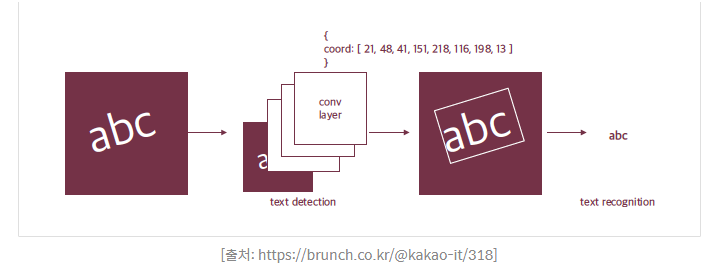

## 2. 딥러닝 문자인식의 시작

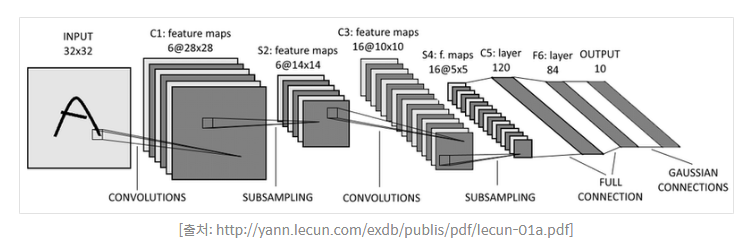
1998년에 발표된 LeNet은 우편번호나 손글씨를 읽기 위해서 만들어졌습니다

하지만 이렇게 단순한 분류 모델만으로는 우리가 위에서 구글 API로 테스트해 보았던 복잡한 결과를 얻을 수 없습니다. 

넓고 복잡한 이미지에서 글자 영역을 찾을 수 없을뿐더러 글자를 영역별로 잘라서 넣더라도 우리가 인식하기를 원하는 사진은 여러 글자가 모여있기 때문에 단순한 분류 문제로 표현이 불가능하지요.

## 3. 사진 속 문자 찾아내기 - detection

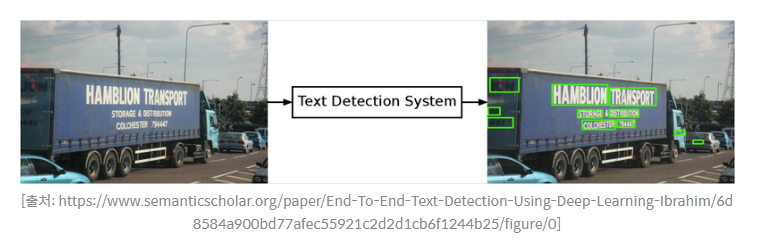

사진 속 문자를 찾아내는 최근의 딥러닝 모델은 일반적인 Object Detection(객체 인식) 방법으로 접근합니다. 

이미지 속에서 물체를 찾아내는 딥러닝 모델에게 문자를 찾도록 학습을 시킨 것이죠. 

물론 문자의 특성에 따라서 모델을 변경해 주기도 합니다.

딥러닝 기반 객체 검출 방법에는 Regression(회귀) 방식이나 Segmentation(세그멘테이션) 방식이 있습니다. 

Regression은 기준으로 하는 박스 대비 문자의 박스가 얼마나 차이가 나는지를 학습합니다. Segmentation은 픽셀 단위로 해당 픽셀이 문자를 표현하는지를 분류하는 문제(pixel-wise classification)라고 볼 수 있습니다. 

객체 검출과 세그멘테이션에 대한 자세한 방법은 다른 강의에서 배우도록 합시다. 

여기서는 문자를 찾아내는 딥러닝 모델이 우리가 흔히 들어본 Object Detection과 큰 차이가 없다는 것만 알아두셔도 됩니다.

## 4.사진 속 문자 읽어내기 - recognition

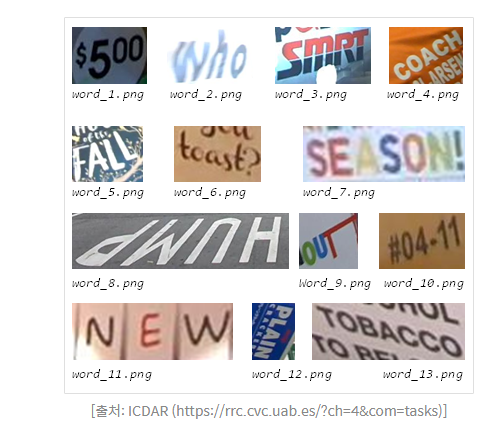

문자 인식은 사진 속에서 문자를 검출해 내는 검출 모델이 영역을 잘라서 주면 그 영역에 어떤 글자가 포함되어 있는지 읽어내는 과정입니다. 

아래는 ICDAR15라는 OCR 데이터셋에서 단어 단위로 잘린 이미지입니다. 

문자 인식 모델은 이렇게 작게 잘린 이미지가 들어오면 이미지 속에 어떤 단어가 포함됐는지 찾아내지요.

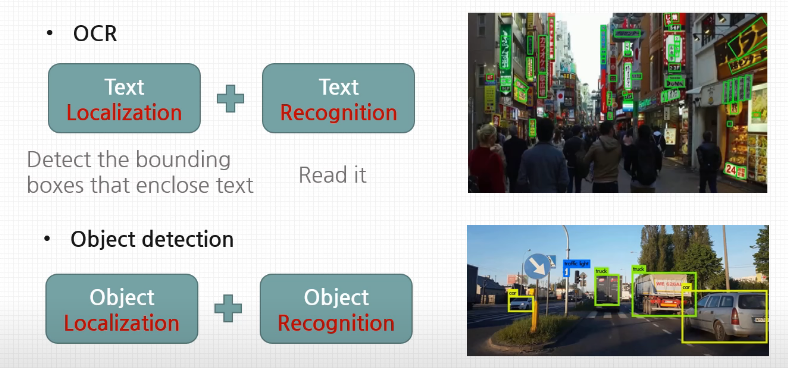

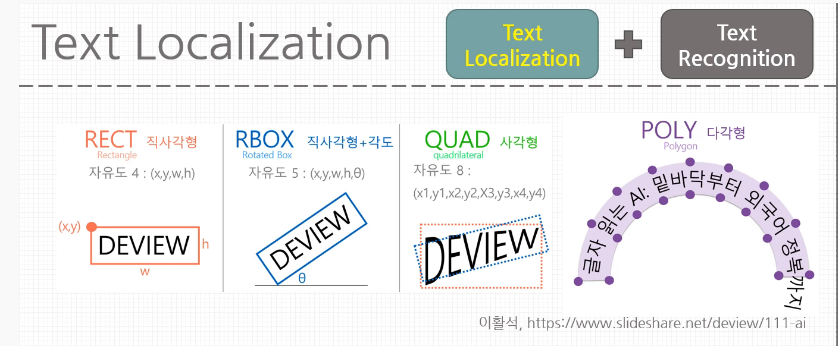

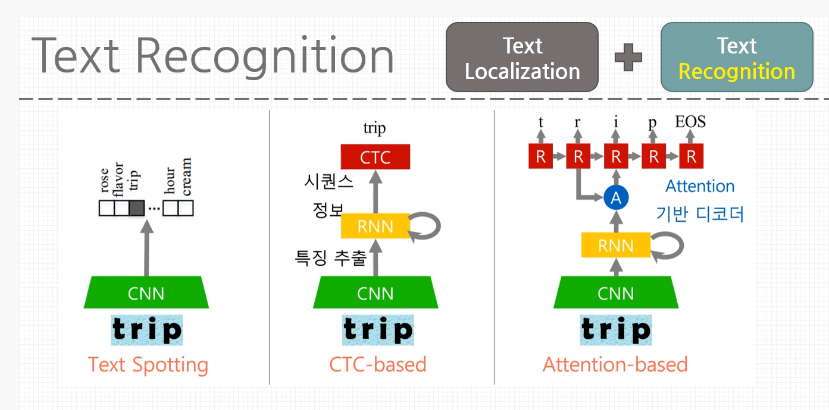

## 5.keras-ocr 써보기
텐서플로우를 기반으로 모델을 구현해서 OCR을 직접 돌려보도록 하겠습니다.

keras-ocr은 텐서플로우의 케라스 API를 기반으로 이미지 속 문자를 읽는 End-to-End OCR을 할 수 있게 해줍니다. 

공식 문서에도 나와 있듯, 검출 모델로는 네이버 데뷰 2018 영상에서 소개한 CRAFT(Character Region Awareness for Text Detection)를 사용하고, 인식 모델로는 앞에서 설명한 CRNN을 사용합니다.



In [1]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


만들어둔 파이프라인의 recognize() 에 이미지를 몇 개 넣어줍니다.

이미지 소스의 url을 사용할 건데요. 
이미지는 https://unsplash.com/s/photos/text 에서 가져왔습니다.

In [2]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_urls = [
  'https://source.unsplash.com/M7mu6jXlcns/640x460',
  'https://source.unsplash.com/6jsp4iHc8hI/640x460',
  'https://source.unsplash.com/98uYQ-KupiE',
  'https://source.unsplash.com/j9JoYpaJH3A',
  'https://source.unsplash.com/eBkEJ9cH5b4'
]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

이제 인식된 결과를 pyplot으로 시각화를 해봅니다.

사용이 매우 간단합니다! 내부적으로 recognize() 는 검출기와 인식기를 두고, 

검출기로 바운딩 박스(bounding box, 문자가 있는 영역을 표시한 정보)를 검출한 뒤, 

인식기가 각 박스로부터 문자를 인식하는 과정을 거치도록 합니다.

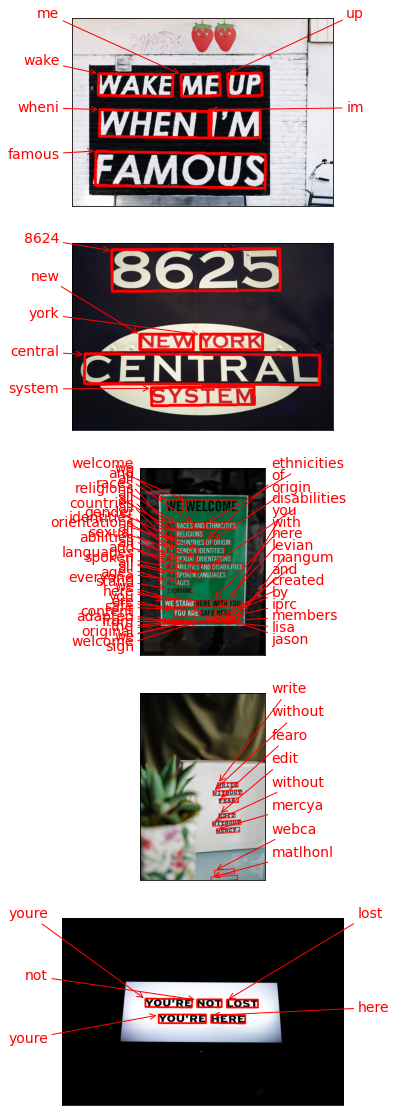

In [3]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

**주의사항)
keras-ocr은 한글 데이터셋으로 훈련이 되어있지 않은 모델입니다. 한글 텍스트의 detection은 정상적으로 진행되더라도 recognition 결과가 엉뚱하게 나올 수 있음에 주의해 주세요.**

## 6.Tesseract

테서랙트는 구글에서 후원하는 OCR 오픈소스 라이브러리로 현재는 버전 4와 Tesseract.js등으로 확장되는 등 많은 곳에서 사용되고 있습니다. 

버전 4에서는 LSTM이 엔진에 추가되었고 현재 한국어를 포함한 116 개 국어를 지원하고 있습니다.

### 1) 테서랙트 설치하기

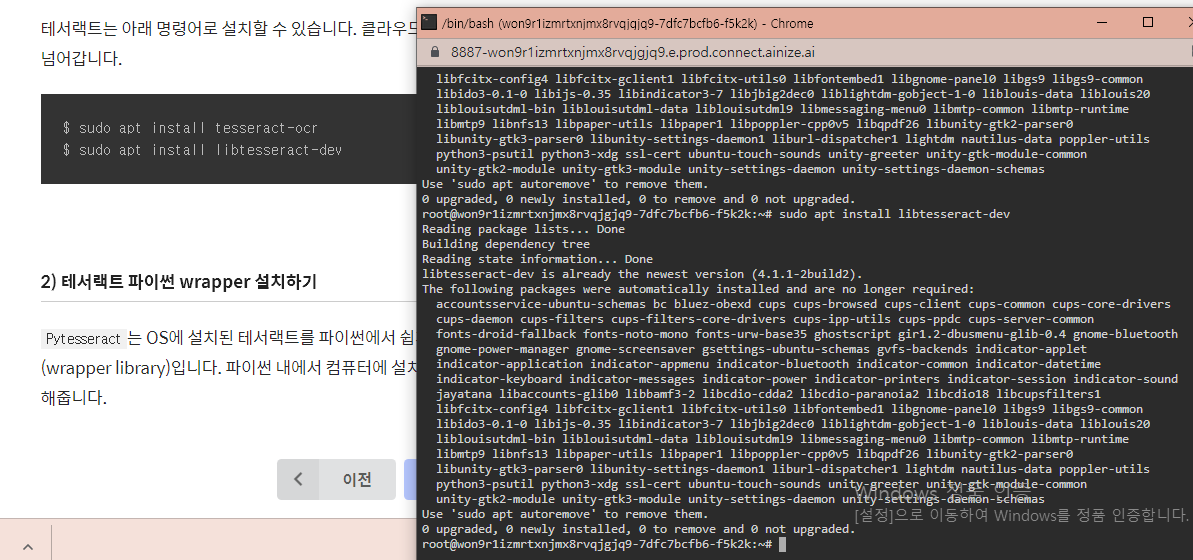

### 2) 테서랙트 파이썬 wrapper 설치하기

Pytesseract는 OS에 설치된 테서랙트를 파이썬에서 쉽게 사용할 수 있도록 해주는 래퍼 라이브러리(wrapper library)입니다. 

파이썬 내에서 컴퓨터에 설치된 테서랙트 엔진의 기능을 바로 쓸 수 있도록 해줍니다.

### 3) 테서랙트로 문자 검출하고 이미지 자르기 (detection)

In [4]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/test_image.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/0000.png


위에서 구현한 crop_word_regions() 함수는 여러분이 선택한 테스트 이미지를 받아서, 문자 검출을 진행한 후, 

검출된 문자 영역을 crop한 이미지로 만들어 그 파일들의 list를 리턴하는 함수입니다.

기본적으로 pytesseract.image_to_data() 를 사용합니다. 

파이썬에서 편하게 사용하기 위해서 pytesseract 의 Output 을 사용해서 결괏값의 형식을 딕셔너리(DICT) 형식으로 설정해 주게 됩니다. 이렇게 인식된 결과는 바운딩 박스의 left, top, width, height 정보를 가지게 됩니다. 바운딩 박스를 사용해 이미지의 문자 영역들을 파이썬 PIL(pillow) 또는 opencv 라이브러리를 사용해 잘라(crop)서 cropped_image_path_list에 담아 리턴하였습니다.

(주의) 위 코드에서 lang='kor' 로 바꾸면 에러가 발생합니다. 테서랙트의 언어팩을 설치해야 정상 동작하게 됩니다.

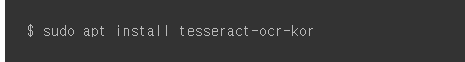

### 4) 테서랙트로 잘린 이미지에서 단어 인식하기

In [5]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)


Done


# II. 프로젝트 : 다양한 OCR모델 비교하기

### Step1. 검증용 데이터셋 준비

/aiffel/aiffel/ocr_python/sample_img
['/aiffel/aiffel/ocr_python/sample_img/sam1.jpg', '/aiffel/aiffel/ocr_python/sample_img/sam2.jpg', '/aiffel/aiffel/ocr_python/sample_img/sam3.jpg', '/aiffel/aiffel/ocr_python/sample_img/sam4.jpg', '/aiffel/aiffel/ocr_python/sample_img/sam5.jpg', '/aiffel/aiffel/ocr_python/sample_img/sam6.jpg']


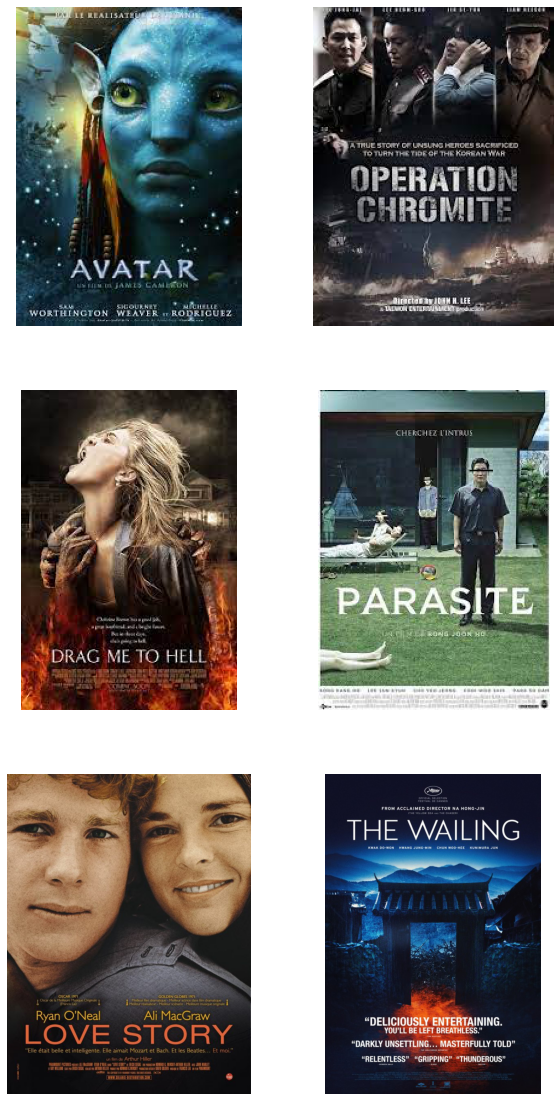

In [51]:
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as img

dir_path = os.getenv('HOME')+'/aiffel/ocr_python/sample_img'
ext = '/*.jpg'
file_list = glob.glob(dir_path + ext)
file_list.sort()
print(dir_path)
print (file_list)

#https://8888-won9r1izmrtxnjmx8rvqjgjq9.e.prod.connect.ainize.ai/view/aiffel/ocr_python/sample_img/sam1.jpg

#포스터 가져오기
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,20))

for i, ax in enumerate(axes.flatten()):
    image = img.imread(file_list[i])
    ax.imshow(image)
    ax.axis("off")
plt.show()

### Step2. keras-ocr, Tesseract로 테스트 진행(Google OCR API는 X)

### 1) keras-ocr

In [52]:
import keras_ocr

#keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [53]:
images = [keras_ocr.tools.read(file) for file in file_list]
prediction_groups = [pipeline.recognize([file]) for file in file_list]

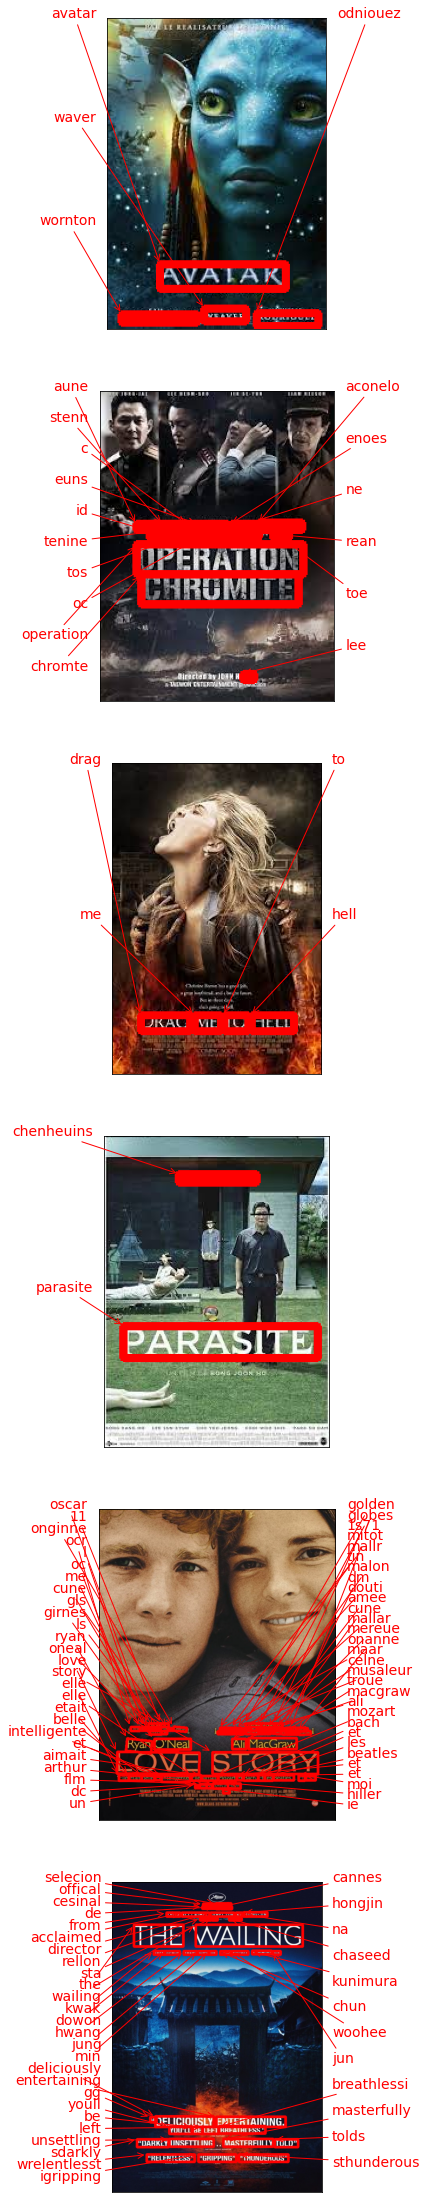

In [54]:
#인식된 결과 시각화
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 40))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

### 2) Tesseract

In [55]:
import pytesseract
from PIL import Image
from pytesseract import Output

def crop_word_and_recognize(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")

            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1

    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")     

In [56]:
file_name = []
for file in file_list :
    file_name.append(file[-8:])
    
print(file_name)

img_dir = os.getenv('HOME')+'/aiffel/ocr_python/sample_img'

for names in file_name:
    print(os.path.join(img_dir, names))

['sam1.jpg', 'sam2.jpg', 'sam3.jpg', 'sam4.jpg', 'sam5.jpg', 'sam6.jpg']
/aiffel/aiffel/ocr_python/sample_img/sam1.jpg
/aiffel/aiffel/ocr_python/sample_img/sam2.jpg
/aiffel/aiffel/ocr_python/sample_img/sam3.jpg
/aiffel/aiffel/ocr_python/sample_img/sam4.jpg
/aiffel/aiffel/ocr_python/sample_img/sam5.jpg
/aiffel/aiffel/ocr_python/sample_img/sam6.jpg


['sam1.jpg', 'sam2.jpg', 'sam3.jpg', 'sam4.jpg', 'sam5.jpg', 'sam6.jpg']
[sam1.jpg]


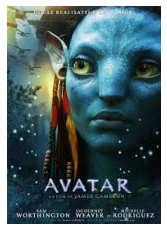


Done
[sam2.jpg]


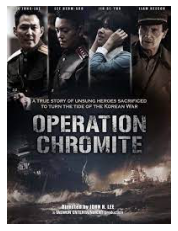

atl

Sih

av.

1

Done
[sam3.jpg]


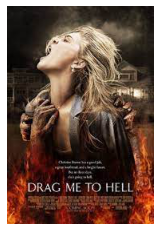

”

a

‘2

DRAG

Vi

TC

ipae ee

k


4

Mi

Done
[sam4.jpg]


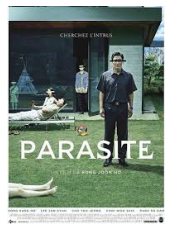


Done
[sam5.jpg]


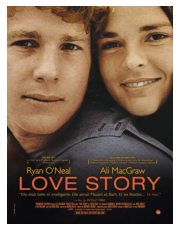


Dele

C)' Neal

R@)hvVs=

STORY

lamar

Delle et intelligente.

mileeellaeriit

hw

O7ar©rt

las

O'Neal Ali MacGraw

a

Done
[sam6.jpg]


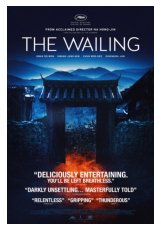

elt acd

Ah

WV,

ILING


a



re ee

a eS.

Done


In [58]:
save_dir = os.getenv('HOME')+'/aiffel/ocr_python/sample_img'
print(file_name)
for names in file_name:
    print(f'[{names}]')
    
    try:
        image = img.imread(os.path.join(img_dir, names))
        plt.imshow(image)
        plt.axis("off")
        plt.show()
        crop_word_and_recognize(os.path.join(img_dir, names), save_dir)
    except:
        print(f'문자를 찾을수가 없음 {names}')

## 한글은 어떨까?

/aiffel/aiffel/ocr_python/ko_sample_img
['/aiffel/aiffel/ocr_python/ko_sample_img/ko_sam1.jpg', '/aiffel/aiffel/ocr_python/ko_sample_img/ko_sam2.jpg', '/aiffel/aiffel/ocr_python/ko_sample_img/ko_sam3.jpg', '/aiffel/aiffel/ocr_python/ko_sample_img/ko_sam4.jpg']


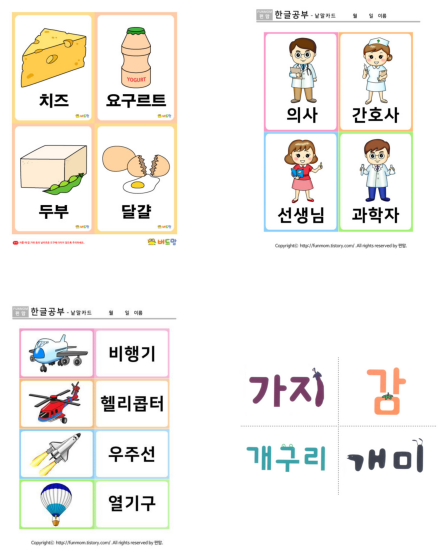

In [62]:
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as img

dir_path = os.getenv('HOME')+'/aiffel/ocr_python/ko_sample_img'
ext = '/*.jpg'
file_list = glob.glob(dir_path + ext)
file_list.sort()
print(dir_path)
print (file_list)

#https://8888-won9r1izmrtxnjmx8rvqjgjq9.e.prod.connect.ainize.ai/view/aiffel/ocr_python/sample_img/sam1.jpg

#포스터 가져오기
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,10))

for i, ax in enumerate(axes.flatten()):
    image = img.imread(file_list[i])
    ax.imshow(image)
    ax.axis("off")
plt.show()

### 1) keras-ocr

In [63]:
import keras_ocr

#keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [64]:
images = [keras_ocr.tools.read(file) for file in file_list]
prediction_groups = [pipeline.recognize([file]) for file in file_list]

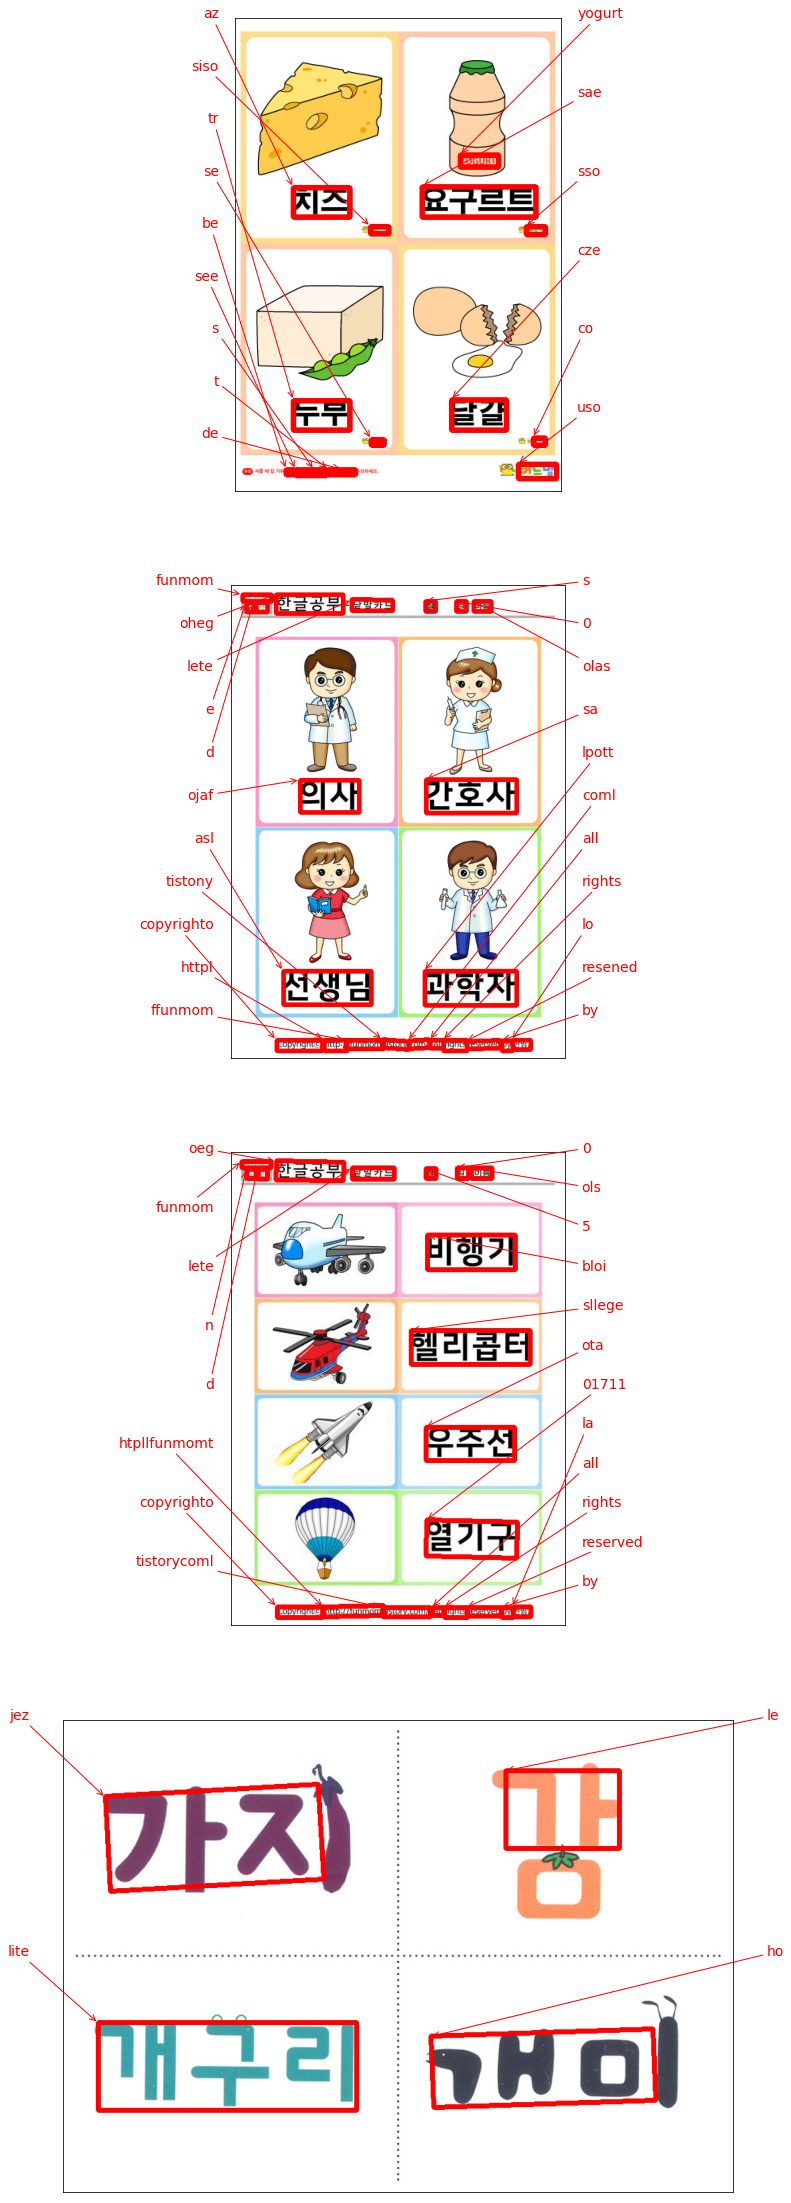

In [65]:
#인식된 결과 시각화
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 40))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

## keras-ocr은 한글 데이터셋으로 훈련이 되어있지 않은 모델입니다.

### 한글 텍스트의 detection은 정상적으로 진행되더라도 recognition 결과가 엉뚱하게 나올 수 있음에 주의해 주세요.

### 2) Tesseract

In [66]:
import pytesseract
from PIL import Image
from pytesseract import Output

def crop_word_and_recognize(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor',    
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")

            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1

    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])

In [68]:
file_name = []
for file in file_list :
    file_name.append(file[-11:])
    
print(file_name)

img_dir = os.getenv('HOME')+'/aiffel/ocr_python/ko_sample_img'

for names in file_name:
    print(os.path.join(img_dir, names))

['ko_sam1.jpg', 'ko_sam2.jpg', 'ko_sam3.jpg', 'ko_sam4.jpg']
/aiffel/aiffel/ocr_python/ko_sample_img/ko_sam1.jpg
/aiffel/aiffel/ocr_python/ko_sample_img/ko_sam2.jpg
/aiffel/aiffel/ocr_python/ko_sample_img/ko_sam3.jpg
/aiffel/aiffel/ocr_python/ko_sample_img/ko_sam4.jpg


['ko_sam1.jpg', 'ko_sam2.jpg', 'ko_sam3.jpg', 'ko_sam4.jpg']
[ko_sam1.jpg]


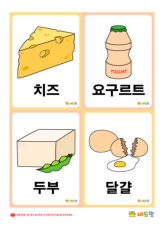


[ko_sam2.jpg]


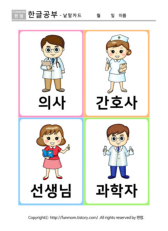


00191

1나02:/ /14000000.티51017.6000/

.씨1 [10115 「65617760

0

떠맘.

:

.

[ko_sam3.jpg]


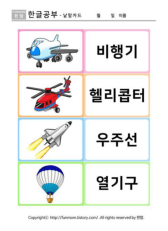

ㄴ001+01111디

110:/ /1411070000 05197. 00070 /

11 [10115 「16561060 0\

뼈 맘


}

[ko_sam4.jpg]


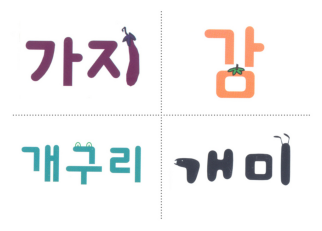

개구리

개미



In [69]:
save_dir = os.getenv('HOME')+'/aiffel/ocr_python/sample_img'
print(file_name)
for names in file_name:
    print(f'[{names}]')
    
    try:
        image = img.imread(os.path.join(img_dir, names))
        plt.imshow(image)
        plt.axis("off")
        plt.show()
        crop_word_and_recognize(os.path.join(img_dir, names), save_dir)
    except:
        print(f'문자를 찾을수가 없음 {names}')

## 음...... 영어단어장은 잘 맞출까? 

/aiffel/aiffel/ocr_python/card_img
['/aiffel/aiffel/ocr_python/card_img/card1.jpg', '/aiffel/aiffel/ocr_python/card_img/card2.jpg', '/aiffel/aiffel/ocr_python/card_img/card3.jpg', '/aiffel/aiffel/ocr_python/card_img/card4.jpg', '/aiffel/aiffel/ocr_python/card_img/card5.jpg', '/aiffel/aiffel/ocr_python/card_img/card6.jpg']


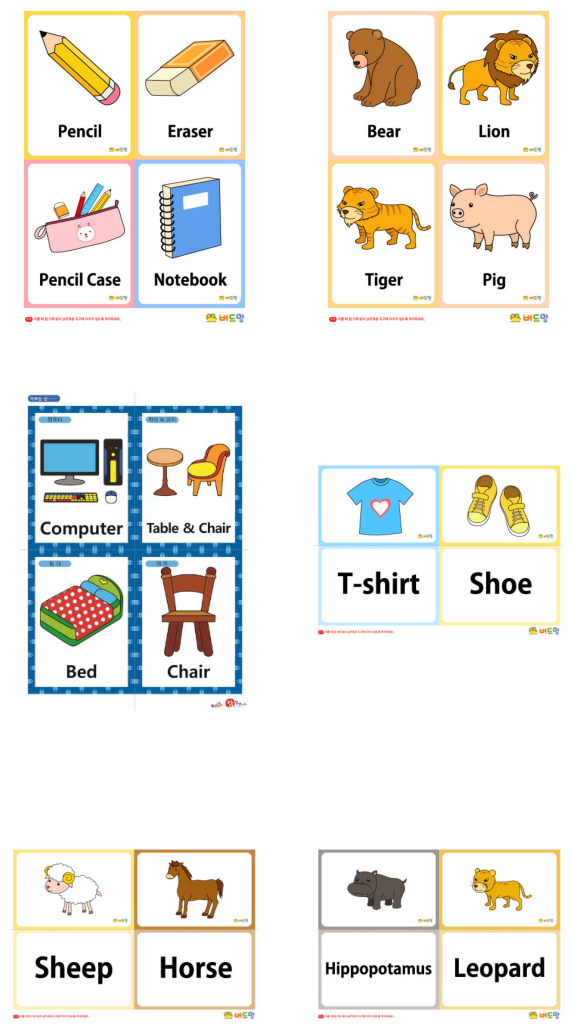

In [72]:
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as img

dir_path = os.getenv('HOME')+'/aiffel/ocr_python/card_img'
ext = '/*.jpg'
file_list = glob.glob(dir_path + ext)
file_list.sort()
print(dir_path)
print (file_list)

#https://8888-won9r1izmrtxnjmx8rvqjgjq9.e.prod.connect.ainize.ai/view/aiffel/ocr_python/sample_img/sam1.jpg

#포스터 가져오기
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,20))

for i, ax in enumerate(axes.flatten()):
    image = img.imread(file_list[i])
    ax.imshow(image)
    ax.axis("off")
plt.show()

### 1) keras-ocr

In [73]:
import keras_ocr

#keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [74]:
images = [keras_ocr.tools.read(file) for file in file_list]
prediction_groups = [pipeline.recognize([file]) for file in file_list]

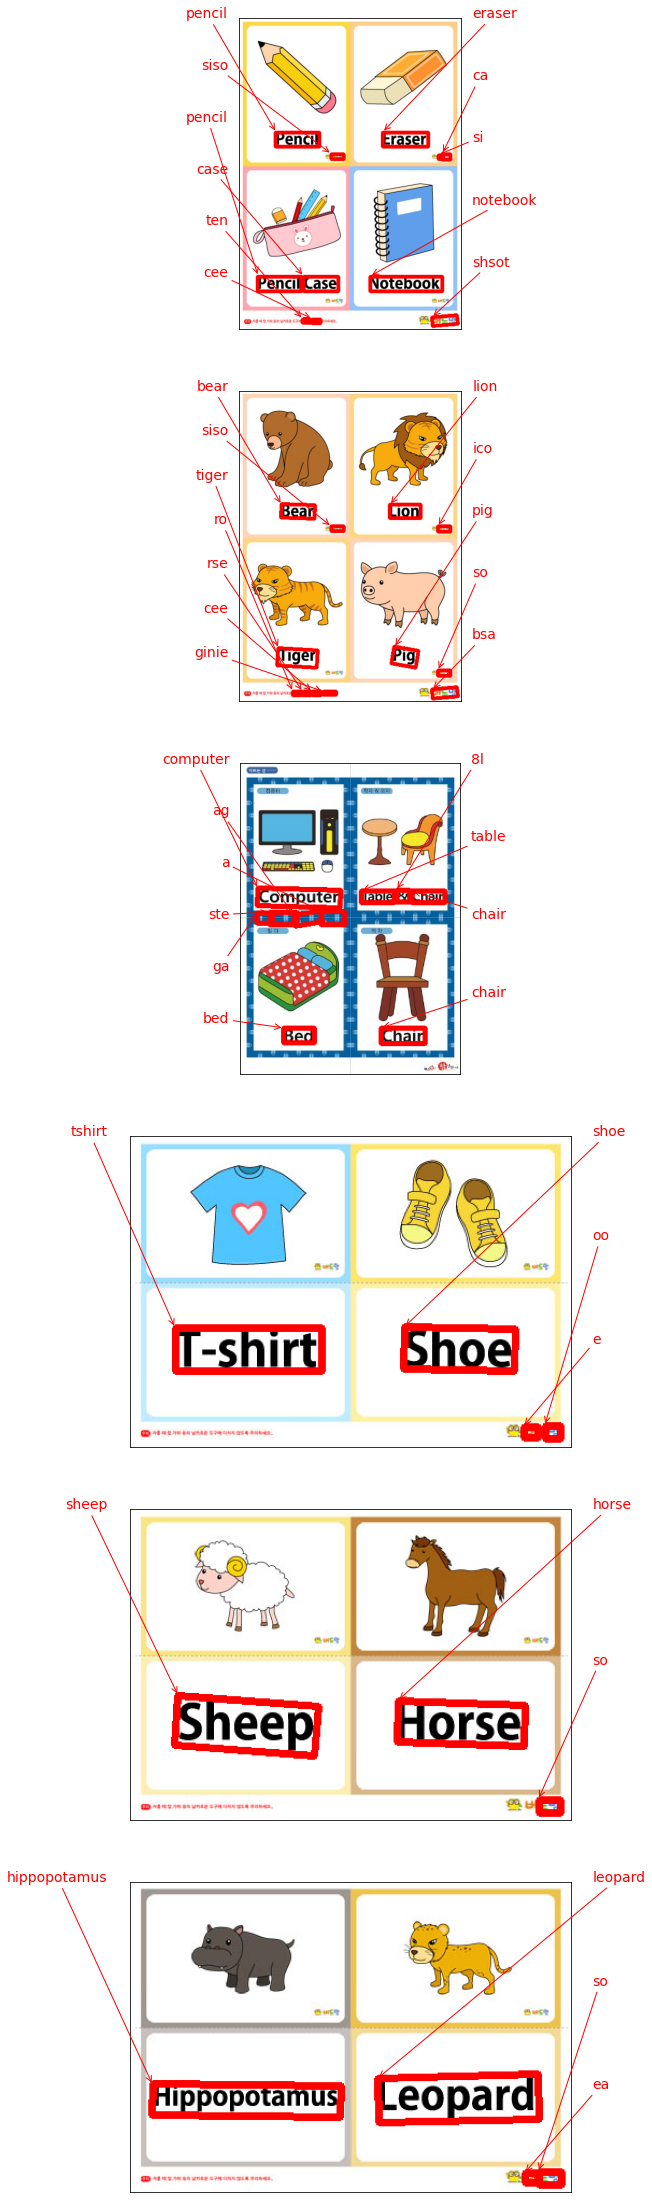

In [75]:
#인식된 결과 시각화
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 40))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

### 2) Tesseract

In [76]:
import pytesseract
from PIL import Image
from pytesseract import Output

def crop_word_and_recognize(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")

            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1

    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])

In [78]:
file_name = []
for file in file_list :
    file_name.append(file[-9:])
    
print(file_name)

img_dir = os.getenv('HOME')+'/aiffel/ocr_python/card_img'

for names in file_name:
    print(os.path.join(img_dir, names))

['card1.jpg', 'card2.jpg', 'card3.jpg', 'card4.jpg', 'card5.jpg', 'card6.jpg']
/aiffel/aiffel/ocr_python/card_img/card1.jpg
/aiffel/aiffel/ocr_python/card_img/card2.jpg
/aiffel/aiffel/ocr_python/card_img/card3.jpg
/aiffel/aiffel/ocr_python/card_img/card4.jpg
/aiffel/aiffel/ocr_python/card_img/card5.jpg
/aiffel/aiffel/ocr_python/card_img/card6.jpg


['card1.jpg', 'card2.jpg', 'card3.jpg', 'card4.jpg', 'card5.jpg', 'card6.jpg']
[card1.jpg]


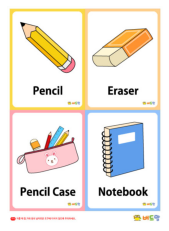

Notebook


[card2.jpg]


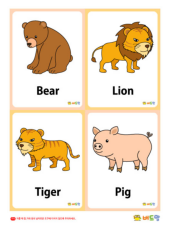

®

[card3.jpg]


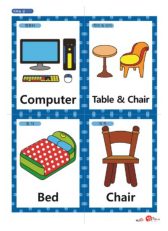

2 2 |

[card4.jpg]


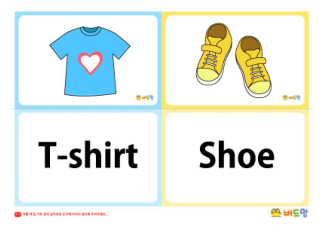

Ly

T-shirt

Shoe

[card5.jpg]


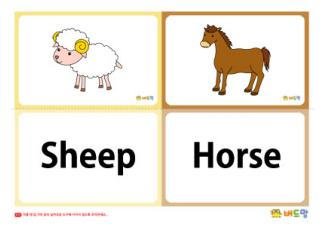


[card6.jpg]


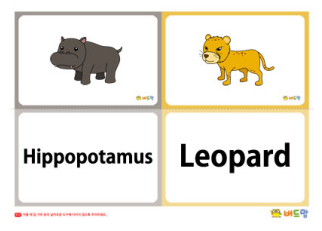


rippopotamus

GD 0865 8 on eee Cerne Ee omnes

'

Leopard

| |

'

a |



In [79]:
save_dir = os.getenv('HOME')+'/aiffel/ocr_python/card_img'
print(file_name)
for names in file_name:
    print(f'[{names}]')
    
    try:
        image = img.imread(os.path.join(img_dir, names))
        plt.imshow(image)
        plt.axis("off")
        plt.show()
        crop_word_and_recognize(os.path.join(img_dir, names), save_dir)
    except:
        print(f'문자를 찾을수가 없음 {names}')